In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

##Q 1

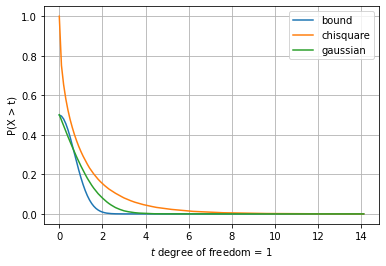

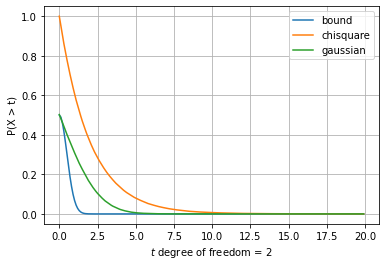

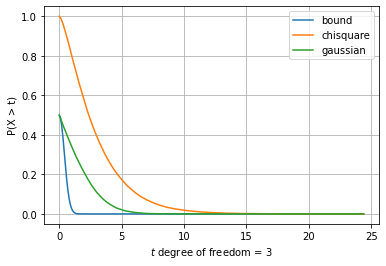

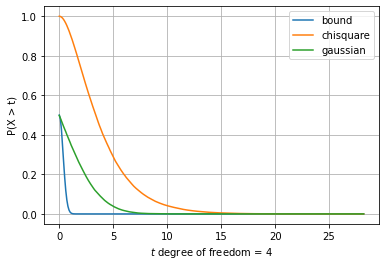

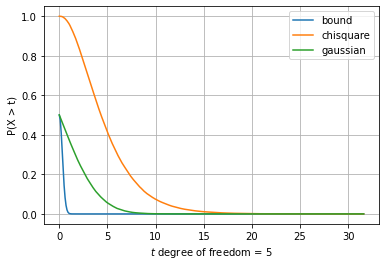

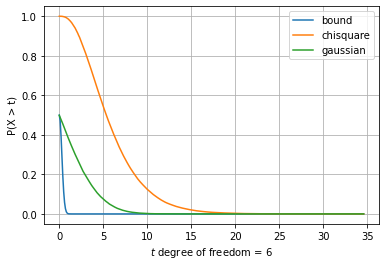

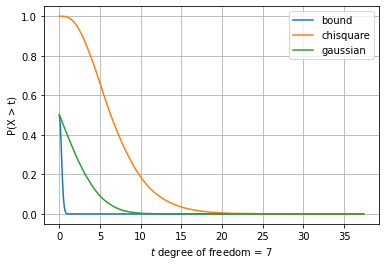

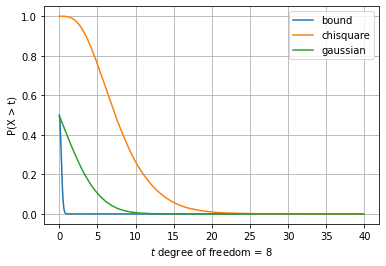

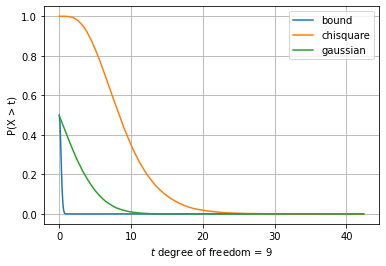

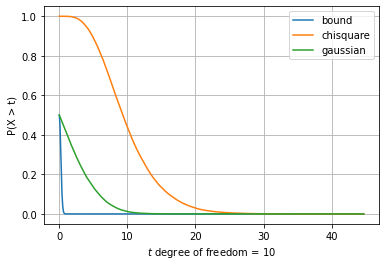

In [ ]:
n = 50000
mu = 0
k = 10
step_size = 0.1

for d in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  variance = 2*d
  sigma = np.sqrt(variance)
  tail_range_gaussian = np.arange(mu, mu + k*sigma, step_size)
  x_g = sigma * np.random.randn(1, n) + mu
  x_c = np.random.chisquare(d, n)

  tail_gaussian = np.zeros(np.size(tail_range_gaussian))
  tail_chi = np.zeros(np.size(tail_range_gaussian))
  tail_bound = np.zeros(np.size(tail_range_gaussian))
  idx = 0

  for t in tail_range_gaussian:
    excess_set = x_c[x_c > t]
    tail_chi[idx] = float(float(np.size(excess_set))/n)
    excess_set = x_g[x_g > t]
    tail_gaussian[idx] = float(float(np.size(excess_set))/n)
    tail_bound[idx] = 0.5*np.exp(-0.5*t*t*sigma*sigma)
    idx += 1
  plt.plot(tail_range_gaussian, tail_bound, label = "bound")
  plt.plot(tail_range_gaussian, tail_chi, label = "chisquare")
  plt.plot(tail_range_gaussian, tail_gaussian, label = "gaussian")
  plt.xlabel('$t$ degree of freedom = ' + str(d))
  plt.ylabel('P(X > t)')
  plt.grid(True)
  plt.legend()
  plt.show()

##Q 2a

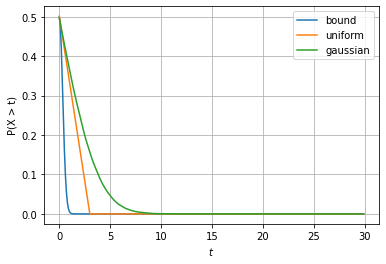

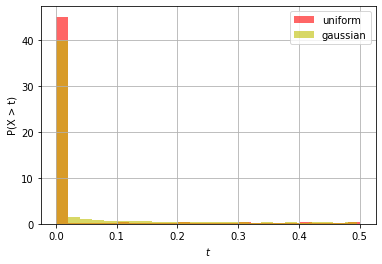

In [ ]:
n = 50000
mu = 0
sigma = 3
a = -3
b = 3
k = 10
step_size = 0.1

x_g = sigma * np.random.randn(1, n) + mu

x_u = np.random.uniform(a, b, n)

tail_range_gaussian = np.arange(mu, mu + k*sigma, step_size)
tail_gaussian = np.zeros(np.size(tail_range_gaussian))
tail_uniform = np.zeros(np.size(tail_range_gaussian))
tail_bound = np.zeros(np.size(tail_range_gaussian))
idx = 0

for t in tail_range_gaussian:
  excess_set = x_u[x_u > t]
  tail_uniform[idx] = float(float(np.size(excess_set))/n)
  excess_set = x_g[x_g > t]
  tail_gaussian[idx] = float(float(np.size(excess_set))/n)
  tail_bound[idx] = 0.5*np.exp(-0.5*t*t*sigma*sigma)
  idx += 1
plt.plot(tail_range_gaussian, tail_bound, label = "bound")
plt.plot(tail_range_gaussian, tail_uniform, label = "uniform")
plt.plot(tail_range_gaussian, tail_gaussian, label = "gaussian")

plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()
#plt.hist(tail_bound, bins=25, density=True, alpha=0.6, color='b', label = 'bound')
plt.hist(tail_uniform, bins=25, density=True, alpha=0.6, color='r', label = 'uniform')
plt.hist(tail_gaussian, bins=25, density=True, alpha=0.6, color='y', label = 'gaussian')
plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()

##Q 2b

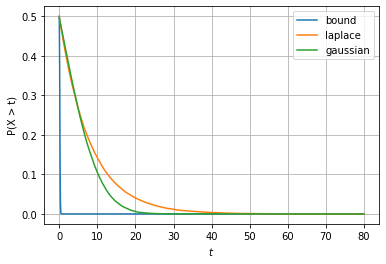

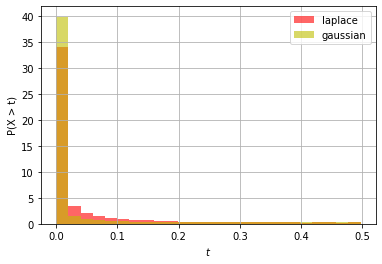

In [ ]:
n = 50000
mu = 0
sigma = 8
b = 2
k = 10
step_size = 0.1

x_g = sigma * np.random.randn(1, n) + mu

x_l = np.random.laplace(mu, 2*b*b, n)

tail_range_gaussian = np.arange(mu, mu + k*sigma, step_size)
tail_gaussian = np.zeros(np.size(tail_range_gaussian))
tail_laplace = np.zeros(np.size(tail_range_gaussian))
tail_bound = np.zeros(np.size(tail_range_gaussian))
idx = 0

for t in tail_range_gaussian:
  excess_set = x_l[x_l > t]
  tail_laplace[idx] = float(float(np.size(excess_set))/n)
  excess_set = x_g[x_g > t]
  tail_gaussian[idx] = float(float(np.size(excess_set))/n)
  tail_bound[idx] = 0.5*np.exp(-0.5*t*t*sigma*sigma)
  idx += 1
plt.plot(tail_range_gaussian, tail_bound, label = "bound")
plt.plot(tail_range_gaussian, tail_laplace, label = "laplace")
plt.plot(tail_range_gaussian, tail_gaussian, label = "gaussian")
plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()
#plt.hist(tail_bound, bins=25, density=True, alpha=0.6, color='b', label = 'bound')
plt.hist(tail_laplace, bins=25, density=True, alpha=0.6, color='r', label = 'laplace')
plt.hist(tail_gaussian, bins=25, density=True, alpha=0.6, color='y', label = 'gaussian')
plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()

##Q 3

individual plots


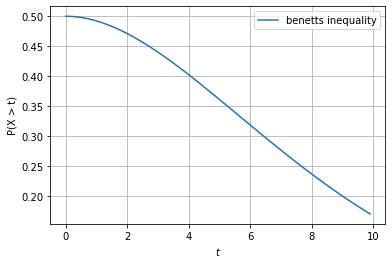

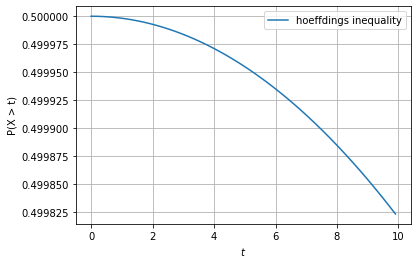

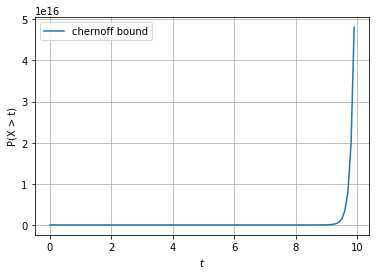

paired plots


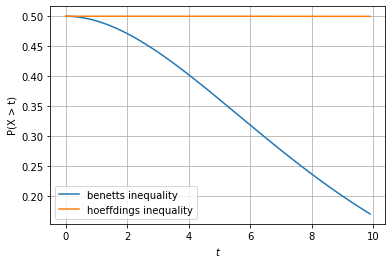

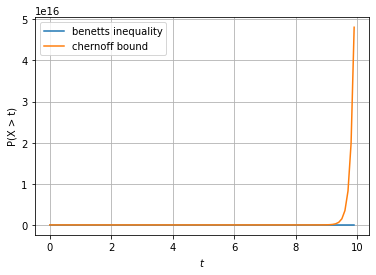

In [ ]:
n = 50000
mu = 0
sigma = 1
p = 30
k = 10
step_size = 0.1

x_g = np.zeros((1, n), float)
mx = 0
mn = 0
for i in range(0, 5):
  temp = sigma * np.random.randn(1, n) + mu
  if np.max(temp) > mx:
    mx = np.max(temp)
  if np.min(temp) < mn:
    mn = np.min(temp)
  x_g = x_g + temp
if(np.abs(mn) > np.abs(mx)):
  m = np.abs(mn) + 1
else:
  m = np.abs(mx) + 1
a = mn - 1
b = mx + 1
l = 1

tail_range_gaussian = np.arange(mu, mu + k*sigma, step_size)
tail_bound_benetts = np.zeros(np.size(tail_range_gaussian))
tail_bound_hoeffdings = np.zeros(np.size(tail_range_gaussian))
tail_bound_chernoff = np.zeros(np.size(tail_range_gaussian))
idx = 0

for t in tail_range_gaussian:
  u = (m*t)/(p*sigma*sigma)
  func_u = (1+u)*np.log(1+u) - u
  tail_bound_benetts[idx] = 0.5*np.exp(((-p*sigma*sigma)/(m*m))*func_u)
  tail_bound_hoeffdings[idx] = 0.5*np.exp((-2*t*t)/(n*(b-a)))
  tail_bound_chernoff[idx] = 0.5*np.exp((-l*t)+((sigma*sigma*t*t)/2))
  idx += 1
print("individual plots")
plt.plot(tail_range_gaussian, tail_bound_benetts, label = "benetts inequality")
plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(tail_range_gaussian, tail_bound_hoeffdings, label = "hoeffdings inequality")
plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(tail_range_gaussian, tail_bound_chernoff, label = "chernoff bound")
plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()
print("paired plots")
plt.plot(tail_range_gaussian, tail_bound_benetts, label = "benetts inequality")
plt.plot(tail_range_gaussian, tail_bound_hoeffdings, label = "hoeffdings inequality")
plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(tail_range_gaussian, tail_bound_benetts, label = "benetts inequality")
plt.plot(tail_range_gaussian, tail_bound_chernoff, label = "chernoff bound")
plt.xlabel('$t$')
plt.ylabel('P(X > t)')
plt.grid(True)
plt.legend()
plt.show()